In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from skimage import io
from tensorflow.keras import datasets, layers, models
from keras.models import load_model


In [2]:
tf.__version__

'2.0.0'

Image1[1]



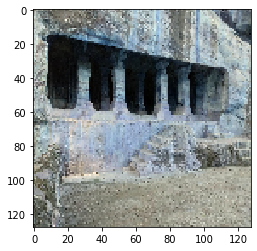

[2]


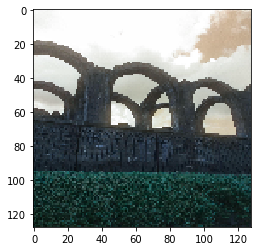

[3]


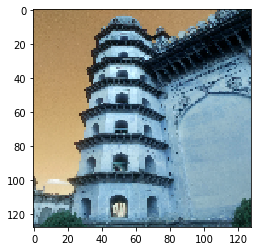

[0]


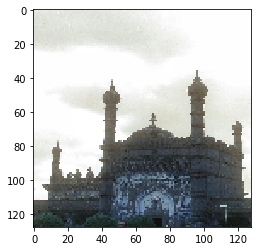

In [3]:
images1 = []
label = []
testimages1 = []
class_names = ["Ibrahim Roza", "Badami", "Bara Kaman", "Gol Gumbaz"]
files=glob.glob("train/Badami/*.jpg")

for file in files:     
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([1])

print("Image1[1]\n")
plt.imshow(images1[1])       
plt.show()





files=glob.glob("train/Bara kaman/*.jpg")

for file in files:               
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([2])

print(label[20])
plt.imshow(images1[20])       
plt.show()

files=glob.glob("train/Gol Gumbaz/*.jpg")

for file in files:    
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([3])

print(label[30])
plt.imshow(images1[30])       
plt.show()


files=glob.glob("train/Ibrahim roza/*.jpg")

for file in files:  
    #image1 = io.imread(file, as_gray=True)
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (128, 128))
    images1.append(resized_image)      
    label.append([0])

print(label[40])
plt.imshow(images1[40])       
plt.show()

files=glob.glob("test/*.jpg")

for file in files:  
    #image1 = io.imread(file, as_gray=True)
    testimage1=cv2.imread(file) 
    resized_image = cv2.resize(testimage1, (128, 128))
    testimages1.append(resized_image)      
    #testlabel.append([0])


testimages2 = np.array(testimages1)
images2=np.array(images1)
label2=np.array(label)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(images2,label2,test_size = 0.2,random_state = 5)

In [5]:
X_test.shape

(10, 128, 128, 3)

In [6]:
y_train

array([[1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [3],
       [0],
       [3],
       [2],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2],
       [3],
       [1],
       [1],
       [1],
       [3],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [3],
       [2],
       [0],
       [3],
       [1],
       [1],
       [2],
       [0],
       [1],
       [3]])

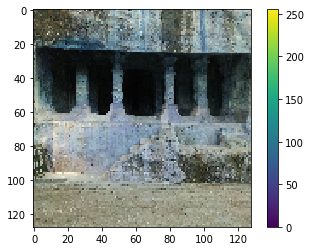

In [7]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
X_train = X_train / 255.0  #normalize
X_test = X_test / 255.0
testimages2 = testimages2 / 255.0


/home/prajj/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


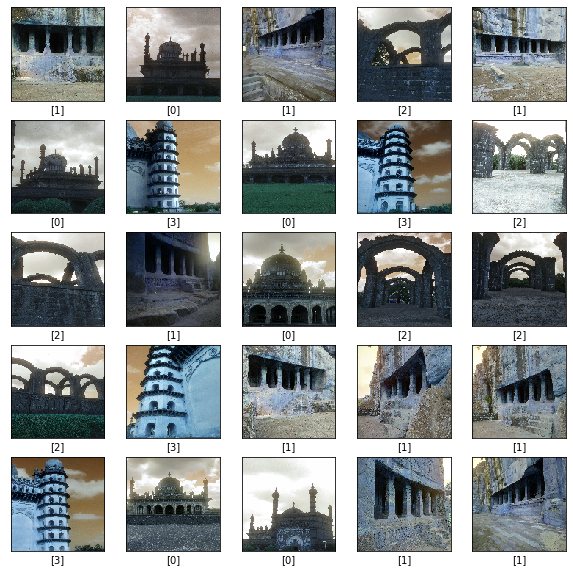

In [9]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])

In [10]:

model = keras.Sequential()
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu', input_shape=(128, 128, 3), use_bias = True))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', use_bias = True))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
Total params: 114,304
Trainable params: 114,304
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [14]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Train on 37 samples, validate on 10 samples
Epoch 1/10
37/37 [==============================] - 3s 90ms/sample - loss: 1.6314 - accuracy: 0.2162 - val_loss: 1.3908 - val_accuracy: 0.3000
Epoch 2/10
37/37 [==============================] - 2s 66ms/sample - loss: 1.3019 - accuracy: 0.5405 - val_loss: 1.5134 - val_accuracy: 0.6000
Epoch 3/10
37/37 [==============================] - 2s 66ms/sample - loss: 1.6492 - accuracy: 0.5405 - val_loss: 1.3508 - val_accuracy: 0.3000
Epoch 4/10
37/37 [==============================] - 2s 66ms/sample - loss: 1.2089 - accuracy: 0.4054 - val_loss: 1.3614 - val_accuracy: 0.4000
Epoch 5/10
37/37 [==============================] - 2s 66ms/sample - loss: 1.0237 - accuracy: 0.5946 - val_loss: 1.3574 - val_accuracy: 0.4000
Epoch 6/10
37/37 [==============================] - 2s 66ms/sample - loss: 0.8354 - accuracy: 0.6216 - val_loss: 0.7492 - val_accuracy: 0.6000
Epoch 7/10
37/37 [==============================] - 2s 67ms/sample - loss: 0.5903 - accuracy: 0.81

10/1 - 0s - loss: 0.3312 - accuracy: 0.8000


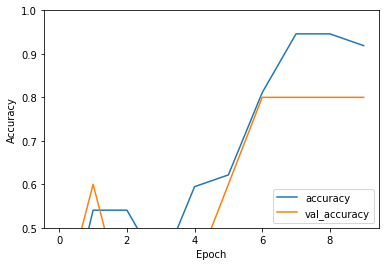

In [15]:
#model.fit(X_train,y_train,epochs = 15)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


In [16]:
print('Test Accuracy: ',test_acc)

Test Accuracy:  0.8


In [18]:

pred = model.predict(testimages2)
pred
class_names[np.argmax(pred[2])]
for i in range (0,testimages2.shape[0]):
    print(class_names[np.argmax(pred[i])])


Bara Kaman
Badami
Bara Kaman
Gol Gumbaz
Ibrahim Roza


In [26]:

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5'